# 감성분석

1. VADER -> 사전 기반 방식 분석  
2. 로지스틱 회귀분석 -> 기계 학습 기반 방식

## VADER 방식 감성분석

In [1]:
import pandas as pd

review_df = pd.read_csv('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\labeledTrainData.tsv',
                       header = 0, sep = '\t', quoting = 3)

In [4]:
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [8]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [9]:
import re

#문서 내의 </br> 태그 제거
review_df['review'] = review_df['review'].str.replace('<br/>',' ')

In [11]:
#영문자가 아닌 것들으 모두 제거
review_df['review'] = review_df['review'].apply(lambda x : re.sub("[^a-zA-Z]"," ",x))

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score


def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [15]:
#비지도학습 기반의 감성 분석

import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\user\A

[nltk_data]    |   Unzipping corpora\sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |

[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#vader 감성분석, 사전기반 감성분석
#0.1을 기준으로 vader는 감성을 구분한다. 0.1 보다 크면 긍정, 0.1보다 작으면 부정적
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
senti_scores

{'neg': 0.117, 'neu': 0.759, 'pos': 0.124, 'compound': -0.0678}

In [23]:
def vader_polarity(review, threshold = 0.1):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(review)
    
    agg_score = score['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment


In [24]:
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))

In [28]:
review_df.head()

,id,sentiment,review,vader_preds
0,"""5814_8""",1,With all this stuff going down at the moment ...,0
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...,1
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...,0
3,"""3630_4""",0,It must be assumed that those who praised thi...,1
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...,1


In [26]:
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

get_clf_eval(y_target, vader_preds)

오차 행렬
[[ 6728  5772]
 [ 1857 10643]]
정확도: 0.6948, 정밀도: 0.6484, 재현율: 0.8514,    F1: 0.7362, AUC:0.6948


## 기계학습 기반 감성분석

In [33]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment'] #Y
feature_df = review_df.drop(['sentiment'], axis = 1, inplace = False) #X

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3,
                                                   random_state = 1215)

print(X_train.shape)
print(y_train.shape)


(17500, 3)
(17500,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [31]:
#머신러닝 기반은 DTM 을 만들어서 해야함 이걸 모델이랑 같이 합쳐서 한번에 하기 위해서 PIPELINE 을 설계

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))]) # C를 조정하여 과대적합 혹은 과소적합 문제 해결 C가 클수록 과적합 가능성 증가, C가 적을수록 과소적합 가능성 증가

In [38]:
pipeline.fit(X_train['review'], y_train)

C:\ca_da\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cnt_vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('lr_clf', LogisticRegression(C=10))])

In [39]:
pred = pipeline.predict(X_test['review'])

print('##로지스틱 회귀 분석 분류 예측 성능 평가##')
get_clf_eval(y_test, pred)

##로지스틱 회귀 분석 분류 예측 성능 평가##
오차 행렬
[[3297  468]
 [ 372 3363]]
정확도: 0.8880, 정밀도: 0.8778, 재현율: 0.9004,    F1: 0.8890, AUC:0.8880


## Lab

In [41]:
import pandas  as pd


review_df = pd.read_csv('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\amazon_mobile_reviews.csv')
                       

In [43]:
review_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [44]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [47]:
review_df = review_df[pd.notnull(review_df['body'])]

In [48]:
review_df = review_df.drop(review_df[review_df['rating'] == 3].index, axis = 0)

In [50]:
review_df['sentiment'] = review_df['rating'].apply(lambda x : 1 if  x >=4 else 0)

In [51]:
review_df = review_df.reset_index(drop = True)

In [54]:
review_df

,asin,name,rating,date,verified,title,body,helpfulVotes,sentiment
0,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,0
1,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,1
2,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,1
3,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,1
4,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,1
...,...,...,...,...,...,...,...,...,...
63208,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,1
63209,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,1
63210,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,1
63211,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,1


In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['body'][0])
senti_scores

{'neg': 0.02, 'neu': 0.876, 'pos': 0.104, 'compound': 0.886}

In [60]:
review_df = review_df.iloc[0:150,:]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#vader 감성분석, 사전기반 감성분석
#0.1을 기준으로 vader는 감성을 구분한다. 0.1 보다 크면 긍정, 0.1보다 작으면 부정적
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
senti_scores

In [61]:
def making_sentiment(review, threshold = 0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    agg_score = scores['compound']
    
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

In [62]:
review_df['sentiment2'] = review_df['body'].apply(lambda x : making_sentiment(x, 0.1))

<ipython-input-62-f52464acccdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['sentiment2'] = review_df['body'].apply(lambda x : making_sentiment(x, 0.1))


In [64]:
y_test = review_df['sentiment']
vader_preds = review_df['sentiment2']
get_clf_eval(y_test, vader_preds)

오차 행렬
[[36 23]
 [14 77]]
정확도: 0.7533, 정밀도: 0.7700, 재현율: 0.8462,    F1: 0.8063, AUC:0.7282


In [67]:
review_df

,asin,name,rating,date,verified,title,body,helpfulVotes,sentiment,sentiment2
0,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,0,1
1,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,1,1
2,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,1,1
3,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,1,1
4,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...
145,B002UHS0UI,BD,5,"October 19, 2014",True,Better than new,Delivered on time. Better than new.,1.0,1,1
146,B002UHS0UI,Amazon Customer,1,"April 22, 2017",True,One Star,Would Not Turn On.,NaN,0,0
147,B002UHS0UI,MSEngine,5,"July 24, 2016",True,Five Stars,"Used this as parts, outdated phone so I have n...",NaN,1,0
148,B002UHS0UI,Dan J. Graber,5,"August 19, 2014",True,love em.,Great phones.. Seller was great to deal with.,1.0,1,1


In [70]:
from sklearn.model_selection import train_test_split

Y = review_df['sentiment']
X = review_df.drop(['sentiment2','sentiment'], axis = 1, inplace = False)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1215)

In [78]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))]) # C를 조정하여 과대적합 혹은 과소적합 문제 해결 C가 클수록 과적합 가능성 증가, C가 적을수록 과소적합 가능성 증가

In [87]:
pipeline.fit(X_train['body'],y_train)
preds = pipeline.predict(X_test['body'])

In [88]:
preds

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [89]:
get_clf_eval(y_test, preds)

오차 행렬
[[12  4]
 [11 18]]
정확도: 0.6667, 정밀도: 0.8182, 재현율: 0.6207,    F1: 0.7059, AUC:0.6853


## CNN 감성분석

In [97]:
import pandas as pd

train_data = pd.read_csv('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\labeledTrainData.tsv',
                       header = 0, sep = '\t', quoting = 3)

In [98]:
train_data

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."


In [99]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
temp = train_data['review'][0].split(' ')

In [104]:
train_data
train_word_counts = train_data['review'].apply(lambda x : len(x.split(' ')))

<ipython-input-111-7fbc8583b93d>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log',nonposy = 'clip')


Text(0, 0.5, 'Number of reviews')

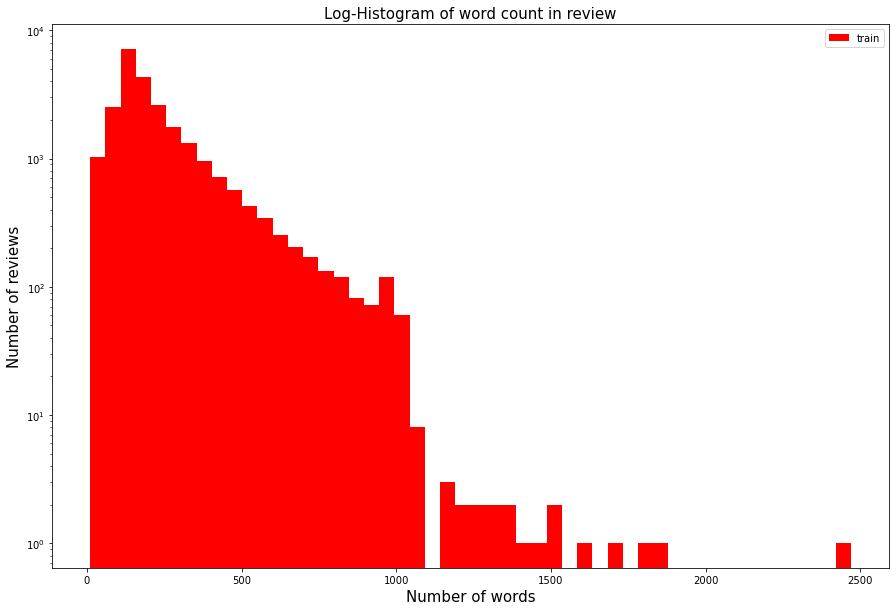

In [111]:
plt.figure(figsize = (15,10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize = 15)
plt.yscale('log',nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [118]:
np.max(train_word_counts)
np.min(train_word_counts)
np.mean(train_word_counts)
np.std(train_word_counts)
np.median(train_word_counts)
np.percentile(train_word_counts, 25)
np.percentile(train_word_counts, 75)


284.0

In [120]:
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [123]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,"html5lib").get_text()

In [125]:
review_text = re.sub("[^a-zA-Z]"," ", review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [126]:
stop_words = set(stopwords.words('english'))

In [135]:
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]
print(words)
clean_review = ' '.join(words)
print(clean_review)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [138]:
def preprocessing(review, remove_stopwords = False):
    #Html 태그 제거
    
    review_text = BeautifulSoup(review,"html5lib").get_text()
    
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        clean_review = " ".join(words)
    else:
        clean_review = " ".join(words)
    
    return clean_review
        
            
    

In [139]:
clean_train_reviews = []

for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
    

In [141]:
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [142]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment' : train_data['sentiment']})

In [143]:
clean_train_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_train_df['review'],clean_train_df['sentiment'],
                                                   test_size = 0.3, random_state = 0)


In [146]:
print(X_train.shape, y_train.shape)

(17500,) (17500,)


In [150]:
#중요

tokenizer = Tokenizer()

#문서 안에 있는 단어들을 숫자 하나하나에 매핑을 한다. (fit_on_texts)
tokenizer.fit_on_texts(X_train) 

#한 문서가 어떤 단어들로 구성되어 있는지 숫자로 매핑된 단어들이 리스트로 담김
text_sequences = tokenizer.texts_to_sequences(X_train) 
print(text_sequences[0])

[407, 37, 15, 9, 218, 828, 2137, 5176, 8457, 35, 31, 309, 1, 32, 126, 708, 557, 776, 11, 123, 1491, 8, 451, 1045, 206, 7513, 203, 1, 531, 714, 6541, 7044, 7044, 221, 110, 577, 7, 11, 584, 3162, 330, 158, 1783, 70, 22, 2, 110, 706, 890, 1228, 1492, 7044, 8945, 164, 669, 691, 1027, 2621, 252, 890, 679, 1492, 3038, 13, 9198, 302, 7044, 78, 116, 8946, 719, 998, 161, 706, 16, 303, 85, 839, 4572, 5611, 161, 52, 914, 706, 4697, 122, 3224]


In [153]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

In [172]:
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'great': 18,
 'first': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'films': 28,
 'watch': 29,
 'two': 30,
 'seen': 31,
 'life': 32,
 'many': 33,
 'plot': 34,
 'never': 35,
 'little': 36,
 'acting': 37,
 'love': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'man': 42,
 'ever': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'scene': 47,
 'say': 48,
 'go': 49,
 'something': 50,
 'scenes': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'thing': 55,
 'old': 56,
 'though': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'actually': 64,
 'funny': 65,
 'find': 66,
 'makes': 67,
 'look': 68,
 'nothing': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'us

In [154]:
print('전체 단어 개수 ', len(word_vocab))

전체 단어 개수  64004


In [155]:
#중요
#데이터 패딩

MAX_SEQUENCE_LENGTH = 174 #174가 안되는건 0으로 채우고 더 긴 것은 자르는 것

train_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')
print(train_inputs.shape)


(17500, 174)


In [157]:
len(text_sequences[0])
train_inputs[0]

array([ 407,   37,   15,    9,  218,  828, 2137, 5176, 8457,   35,   31,
        309,    1,   32,  126,  708,  557,  776,   11,  123, 1491,    8,
        451, 1045,  206, 7513,  203,    1,  531,  714, 6541, 7044, 7044,
        221,  110,  577,    7,   11,  584, 3162,  330,  158, 1783,   70,
         22,    2,  110,  706,  890, 1228, 1492, 7044, 8945,  164,  669,
        691, 1027, 2621,  252,  890,  679, 1492, 3038,   13, 9198,  302,
       7044,   78,  116, 8946,  719,  998,  161,  706,   16,  303,   85,
        839, 4572, 5611,  161,   52,  914,  706, 4697,  122, 3224,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [160]:
#중요
#트레인 레이블 정보를 numpy 배열로

train_labels = np.array(y_train)
train_labels
train_labels.shape

(17500,)

In [167]:
#test data encoding
#위의 작업 똑같이 단, fit_on 레이블링은 하지 않는다.

text_sequences = tokenizer.texts_to_sequences(X_test)
text_sequences[0]
#패딩
test_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')


In [168]:
#test label array 로

test_labels = np.array(y_test)
print(test_labels.shape)

(7500,)


In [169]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [173]:
# 하이퍼파라미터 정의
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_inputs.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': len(word_vocab),
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [174]:
# cnn classifier 정의
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     	     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
        #이게 뭔지 모르겠네
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [177]:
# 모델 생성과 학습
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

# check point 정의
#오버피팅을 막기 위해서 정의

#weight 셋을 저장할 위치
DATA_OUT_PATH = './data_out/'

#val_accuracy 성능 기준으로, 1 epoch 가 돌때 min_delta 이상 나빠지먄 stop, 단 2 epoch 까지는 min_delta 이상 나빠져도 참고
#그 이상일 때 멈춰라 
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)



In [178]:
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./data_out/cnn_classifier_en -- Folder create complete 



In [179]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [180]:
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALID_SPLIT, 
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
31/31 [==============================] - 94s 3s/step - loss: 0.6872 - accuracy: 0.5523 - val_loss: 0.6564 - val_accuracy: 0.7291

Epoch 00001: val_accuracy improved from -inf to 0.72914, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 2/10
31/31 [==============================] - 71s 2s/step - loss: 0.5137 - accuracy: 0.7940 - val_loss: 0.3966 - val_accuracy: 0.8234

Epoch 00002: val_accuracy improved from 0.72914 to 0.82343, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 3/10
31/31 [==============================] - 71s 2s/step - loss: 0.2745 - accuracy: 0.8883 - val_loss: 0.3313 - val_accuracy: 0.8583

Epoch 00003: val_accuracy improved from 0.82343 to 0.85829, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 4/10
31/31 [==============================] - 66s 2s/step - loss: 0.1635 - accuracy: 0.9411 - val_loss: 0.3365 - val_accuracy: 0.8663

Epoch 00004: val_accuracy improved from 0.85829 to 0.86629, saving model to ./data_out/cnn_

In [181]:
# 학습 결과 그리기
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

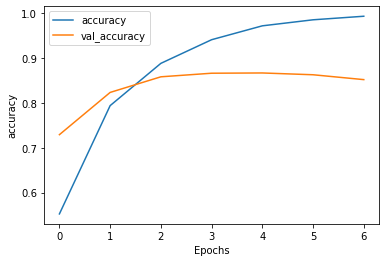

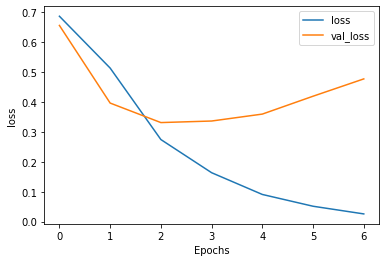

In [182]:

# 결과 플롯

plot_graphs(history, 'accuracy')

plot_graphs(history, 'loss')


In [183]:
# 베스트 모델 불러오기
#저장되어 있는 최적의 weight 불러와서 넣기

SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [184]:
# 예측과 성능 평가
predictions = model.predict(test_inputs, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

predictions

pred=[1 if predictions[i]> 0.5 else 0 for i in range(0,predictions.shape[0])] #최종결과

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score


def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



get_clf_eval(y_test, pred)

오차 행렬
[[3340  449]
 [ 541 3170]]
정확도: 0.8680, 정밀도: 0.8759, 재현율: 0.8542,    F1: 0.8649, AUC:0.8679
